In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

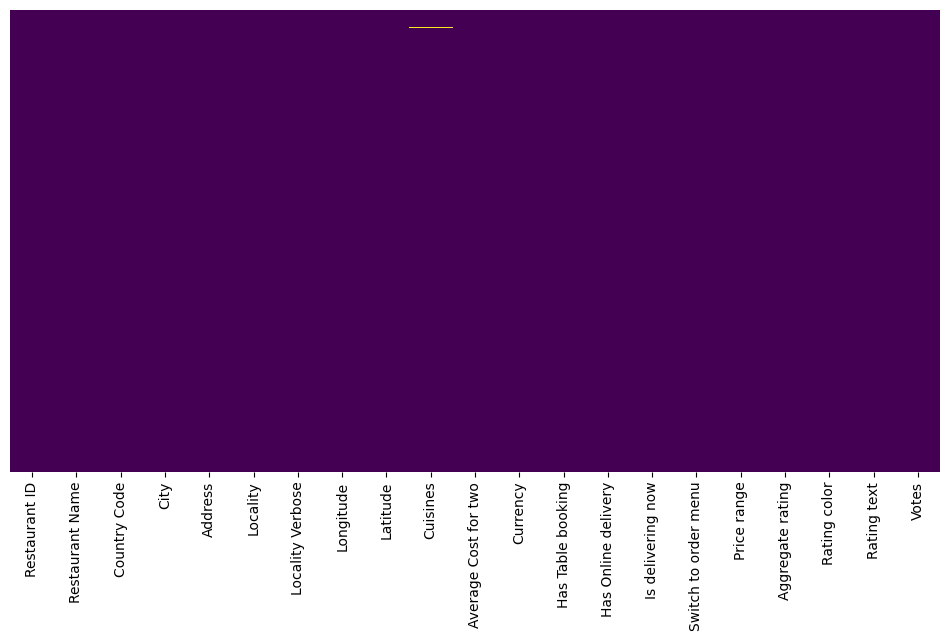

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df_country = pd.read_excel('country-code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [19]:
final_df = pd.merge(df,df_country,on = 'Country Code', how = 'left')

In [20]:
final_df.head

<bound method NDFrame.head of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul  

In [21]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [24]:
country_names = final_df.Country.value_counts().index

In [32]:
country_val = final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1e9eef5f610>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')])

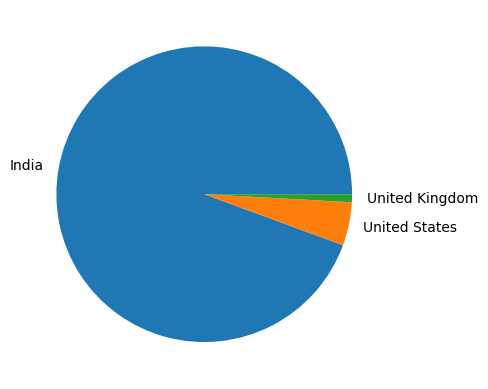

In [37]:
plt.pie(country_val[:3],labels = country_names[:3])

In [38]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [47]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [48]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

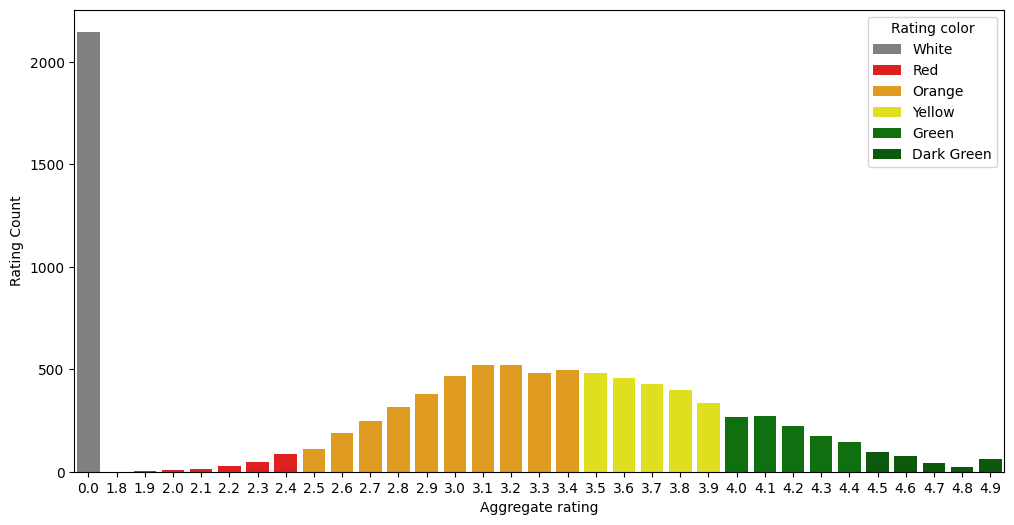

In [58]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x= 'Aggregate rating', y='Rating Count',hue='Rating color', data = ratings, palette=['grey','red','orange','yellow','green','darkgreen'])

<Axes: xlabel='Rating color', ylabel='count'>

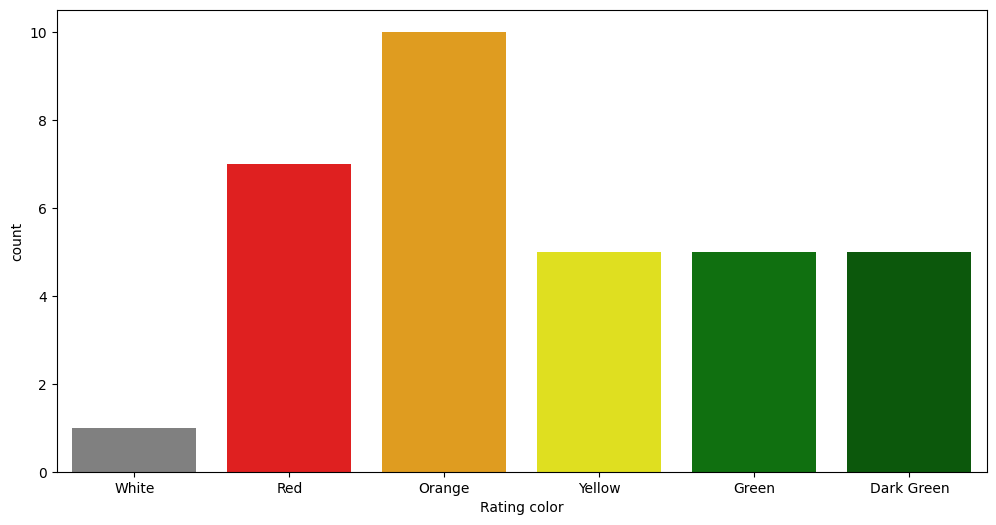

In [61]:
sns.countplot(x='Rating color', data = ratings,hue = 'Rating color', palette=['grey','red','orange','yellow','green','darkgreen'])

In [83]:
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Maximum number of ratings given is from india the total ratings are 2148 out of this 2139 are from India

In [88]:
final_df[['Country', 'Currency']].drop_duplicates().reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,United States,Dollar($)
3,Australia,Dollar($)
4,Canada,Dollar($)
5,Singapore,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


In [91]:
final_df[['Country', 'Has Online delivery']].drop_duplicates().reset_index(drop=True)

,Country,Has Online delivery
0,Phillipines,No
1,Brazil,No
2,United States,No
3,Australia,No
4,Canada,No
5,Singapore,No
6,UAE,No
7,UAE,Yes
8,India,No
9,India,Yes


In [95]:
city_index = final_df.City.value_counts().index
city_values = final_df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x1e9f8b10050>,
 [Text(-0.6145353730323401, 0.9123301350344637, 'New Delhi'),
  Text(0.06236774886414425, -1.0982305149200777, 'Gurgaon'),
  Text(0.878904221413572, -0.6614585169014024, 'Noida'),
  Text(1.0922218482114119, -0.1305811406354216, 'Faridabad'),
  Text(1.099946277419523, -0.010871374841004297, 'Ghaziabad')],
 [Text(-0.33520111256309454, 0.4976346191097074, '68.87%'),
  Text(0.03401877210771504, -0.5990348263200423, '14.07%'),
  Text(0.479402302589221, -0.36079555467349217, '13.59%'),
  Text(0.5957573717516791, -0.07122607671022996, '3.16%'),
  Text(0.5999706967742853, -0.00592984082236598, '0.31%')])

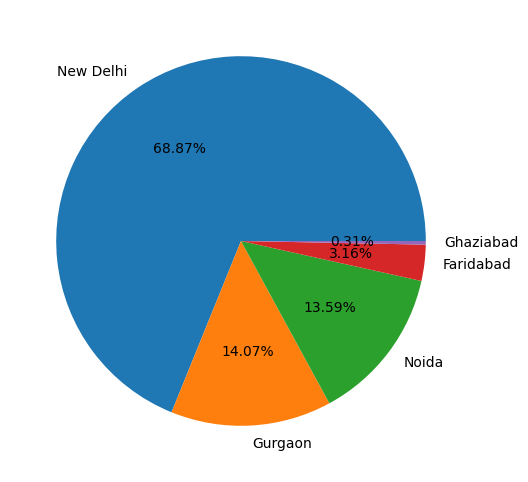

In [100]:
plt.pie(city_values[:5], labels = city_index[:5], autopct ='%1.2f%%')

In [111]:
final_df.Cuisines.value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64